# Machine Learning - Regression Algorithms

## Import Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
X, y = load_diabetes(return_X_y=True)
X = np.array(pd.DataFrame(X)[0]).reshape(-1, 1)

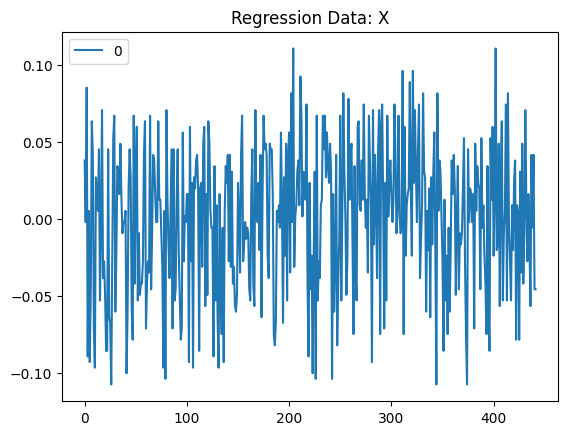

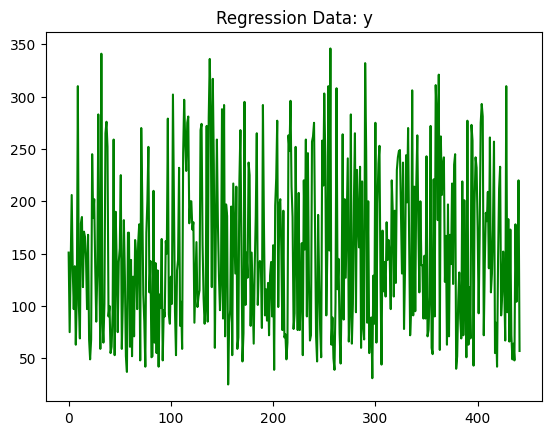

In [11]:
plt.title('Regression Data: X')
sns.lineplot(X, c='b')
plt.show()
plt.title('Regression Data: y')
sns.lineplot(y, c='g')
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

In [13]:
def train_and_plot(clf, X_train, y_train):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_train)
  plt.scatter(X_train, y_train, color = 'lightcoral')
  plt.plot(X_train, y_pred, color = 'firebrick')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.legend(['real', 'prediction'], loc='best', facecolor='white')
  plt.box(False)
  plt.show()

## Linear Regression

Assumptions:


*   Relationship between independent variables and dependent variable is linear
*   The observations are independent of each other
*   Variance of the error term is constant across all levels of the independent variables
*   The error term is normally distributed
*   The independent variables are not highly correlated with each other



In [14]:
reg = LinearRegression()

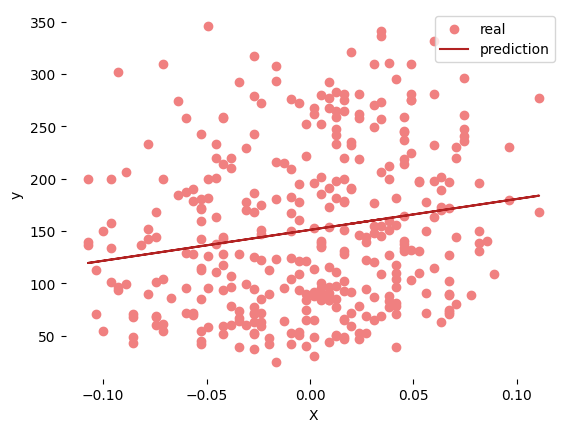

In [15]:
train_and_plot(clf=reg, X_train=X_train, y_train=y_train)

## Polynomial Regression

It can handle non-linear relationships


In [16]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)
# train_and_plot(clf=poly, X_train=X_train, y_train=y_train)

array([[ 1.00000000e+00,  3.80759064e-02,  1.44977465e-03],
       [ 1.00000000e+00, -1.88201653e-03,  3.54198621e-06],
       [ 1.00000000e+00,  8.52989063e-02,  7.27590342e-03],
       ...,
       [ 1.00000000e+00,  4.17084449e-02,  1.73959437e-03],
       [ 1.00000000e+00, -4.54724779e-02,  2.06774625e-03],
       [ 1.00000000e+00, -4.54724779e-02,  2.06774625e-03]])

## Ridge Regression

Linear Regression overfits when the number of independent variables is large.
Ridge regression adds L2 regularization term to the linear regression (Ridge Penalty) to overcome this.

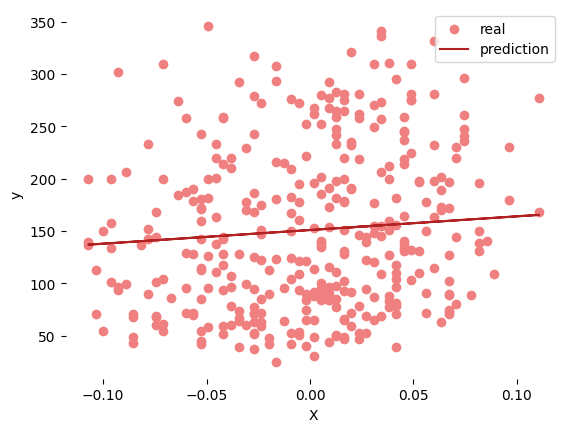

In [17]:
rid = Ridge(alpha=1.0)
train_and_plot(clf=rid, X_train=X_train, y_train=y_train)

## LASSO Regression

It adds L1 regularization term (LASSO Penalty) which has the effect of an indirect feature selection.
It helps select the most important variables and eliminate the less important ones.

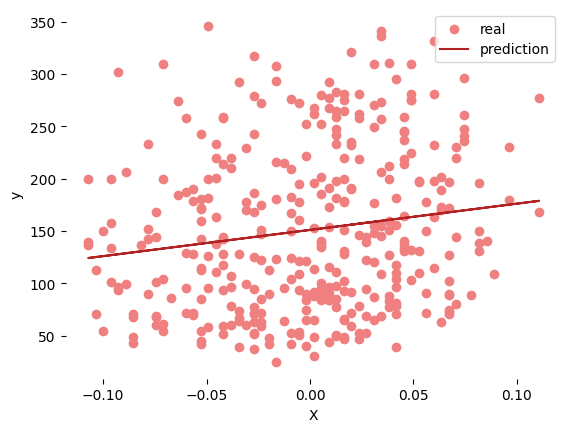

In [18]:
las = linear_model.Lasso(alpha=0.1)
train_and_plot(clf=las, X_train=X_train, y_train=y_train)

## Elastic Net Regression

It's a hybrid of Ridge Regression and LASSO Regression, it adds both L1 and L2 regularization terms

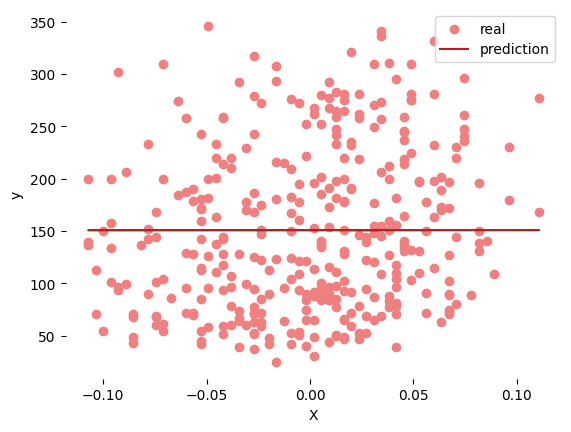

In [19]:
regr = ElasticNet(random_state=0)
train_and_plot(clf=regr, X_train=X_train, y_train=y_train)

## Decision Tree Regression

It can handle both categorical and numerical independent variables, it can handle missing data and it is easy to interpret.


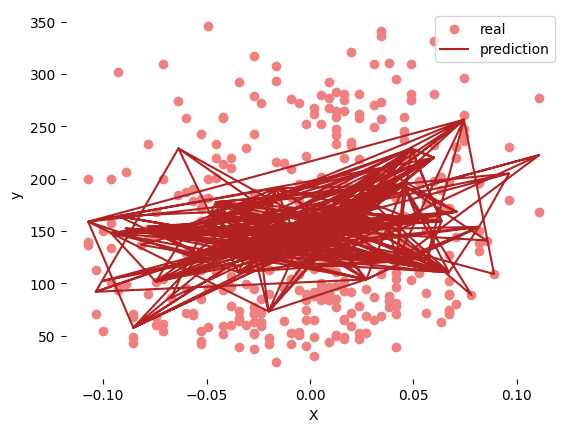

In [20]:
dtr = DecisionTreeRegressor(random_state=0)
train_and_plot(clf=dtr, X_train=X_train, y_train=y_train)

## Support Vector Regression (SVR)

It can handle non-linear and non-separable data by using kernel trick.
It is robust to outliers.

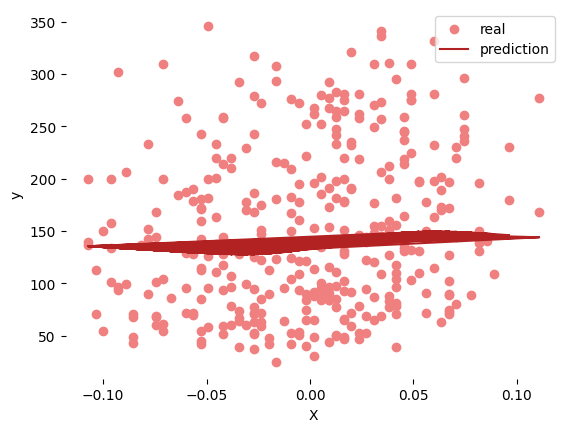

In [21]:
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
train_and_plot(clf=svr, X_train=X_train, y_train=y_train)